## Leading Causes of Death Around the World

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import requests
import time
from scipy.stats import linregress
from pprint import pprint

In [2]:
# Pull in csv files 
annual_num_deaths_csv = ("../Resources/annual-number-of-deaths-by-cause.csv")
mortality_df = pd.read_csv(annual_num_deaths_csv)
mortality_df.dropna

# Second csv for later use
socio_csv = ("../Resources/soci_econ_country_profiles.csv")
socio_df = pd.read_csv(socio_csv)
# socio_df.head()

Deaths - Neoplasms - Sex: Both - Age: All Ages (Number)

In [3]:
# Renaming columns
# Create list of existing columns
column_list = mortality_df.columns

# New column names
new_mort_list = []

for columns in range(len(column_list)):
    new = column_list[columns].replace("Deaths - ","")
    new_two = new.replace(" - Sex: Both - Age: All Ages (Number)", "")
    new_mort_list.append(new_two)

In [4]:
mortality_df.columns = new_mort_list
mortality_df = mortality_df.rename(columns={'Entity':'Country'})
# print(mortality_df['Country'].unique())

In [5]:
# Filter by Years (2014 to 2018)
year = mortality_df['Year']
year = year.astype(int)
year_df = pd.DataFrame(mortality_df.loc[(year >= 2014) & (year <= 2018)])

# Calculating total mortality rate
mort = year_df.iloc[:,3:36]
total_deaths = mort.sum(axis=1)
# Adding column with total mortality rate, per year
year_df['Total Number of Deaths'] = total_deaths
year_df.head()

,Country,Code,Year,Number of executions (Amnesty International),Meningitis,Neoplasms,"Fire, heat, and hot substances",Malaria,Drowning,Interpersonal violence,...,Terrorism (deaths),Cardiovascular diseases,Chronic kidney disease,Chronic respiratory diseases,Cirrhosis and other chronic liver diseases,Digestive diseases,Acute hepatitis,Alzheimer's disease and other dementias,Parkinson's disease,Total Number of Deaths
6,Afghanistan,AFG,2014,6,1935.0,18462.0,463.0,228.0,1757.0,4420.0,...,5414.0,55932.0,5055.0,6851.0,3454.0,6522.0,2134.0,1620.0,502.0,211369.0
7,Afghanistan,AFG,2015,1,1821.0,18876.0,463.0,284.0,1730.0,5039.0,...,6216.0,56875.0,5153.0,6835.0,3492.0,6555.0,2065.0,1652.0,511.0,217939.0
8,Afghanistan,AFG,2016,6,1795.0,19459.0,471.0,388.0,1742.0,5033.0,...,6142.0,57970.0,5296.0,6894.0,3578.0,6673.0,2044.0,1690.0,524.0,223712.0
27,Afghanistan,AFG,2017,NaN,1665.0,20111.0,476.0,399.0,1723.0,5191.0,...,6092.0,59553.0,5419.0,6982.0,3693.0,6841.0,2046.0,1728.0,537.0,217207.0
28,Afghanistan,AFG,2018,NaN,1576.0,20673.0,475.0,466.0,1669.0,5500.0,...,NaN,60893.0,5531.0,7036.0,3732.0,6861.0,1972.0,1757.0,551.0,219391.0


In [6]:
# year_df.sort_values('Total Number of Deaths', axis=1, ascending=False, inplace=True)

In [122]:
# Sort by top causes of death (outside source???)
clean_df = year_df[["Country","Year","Neoplasms","Lower respiratory infections","Neonatal disorders","Cardiovascular diseases","Chronic respiratory diseases",'Total Number of Deaths']]
clean_df.head()

,Country,Year,Neoplasms,Lower respiratory infections,Neonatal disorders,Cardiovascular diseases,Chronic respiratory diseases,Total Number of Deaths
6,Afghanistan,2014,18462.0,21750.0,24163.0,55932.0,6851.0,211369.0
7,Afghanistan,2015,18876.0,21016.0,23953.0,56875.0,6835.0,217939.0
8,Afghanistan,2016,19459.0,20601.0,23956.0,57970.0,6894.0,223712.0
27,Afghanistan,2017,20111.0,19868.0,23956.0,59553.0,6982.0,217207.0
28,Afghanistan,2018,20673.0,19014.0,23841.0,60893.0,7036.0,219391.0


In [123]:
socio_df.head()

,Unnamed: 0,country,Region,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),...,"Inflation, consumer prices (annual %)","Life expectancy at birth, female (years)","Life expectancy at birth, male (years)","Life expectancy at birth, total (years)",Military expenditure (% of GDP),"Population, female","Population, male",Tax revenue (% of GDP),"Taxes on income, profits and capital gains (% of revenue)",Urban population (% of total population)_y
0,0,Argentina,SouthAmerica,2780400,44271,16.2,95.9,632343,2.4,14564.5,...,NaN,79.726,72.924,76.372000,0.856138,22572521.0,21472290.0,10.955501,12.929913,91.749
1,1,Australia,Oceania,7692060,24451,3.2,99.3,1230859,2.4,51352.2,...,1.948647,84.600,80.500,82.500000,2.007966,12349632.0,12252228.0,21.915859,64.110306,85.904
2,2,Austria,WesternEurope,83871,8736,106.0,96.2,376967,1.0,44117.7,...,2.081269,84.000,79.400,81.643902,0.756179,4478340.0,4319226.0,25.355237,27.024073,58.094
3,3,Belarus,EasternEurope,207600,9468,46.7,87.0,54609,-3.9,5750.8,...,6.031837,79.200,69.300,74.129268,1.162417,5077542.0,4420722.0,13.019006,2.933101,78.134
4,4,Belgium,WesternEurope,30528,11429,377.5,97.3,455107,1.5,40277.8,...,2.125971,83.900,79.200,81.492683,0.910371,5766141.0,5609017.0,23.399721,33.727746,97.961


In [124]:
# Cleaning new DataFrame, prepping for merge
socio2_df = socio_df[['country','Life expectancy at birth, total (years)','GDP per capita (current US$)','Health: Total expenditure (% of GDP)','Health: Physicians (per 1000 pop.)','Health Care Index','Population in thousands (2017)']]
socio2_df.columns
socio2_df = socio2_df.rename(columns={
    'Life expectancy at birth, total (years)':'Life Expectancy at birth',
    'GDP per capita (current US$)':'GDP per capita ($)',
    'Health: Total expenditure (% of GDP)':'Total expenditure (% GDP)',
    'Health: Physicians (per 1000 pop.)':'Physicians (per 1000)',
    'Population in thousands (2017)':'Population in thousands'
})

In [125]:
# Merging 
new_df = clean_df.merge(socio2_df, how='inner', left_on='Country', right_on='country')
new_df = new_df.drop('country', 1)

In [149]:
twenty17 = new_df.loc[(new_df['Year'] == 2017)]
pop = twenty17['Population in thousands']*1000
total_death_rate = (twenty17['Total Number of Deaths'] / pop)*100

In [150]:
new_df['Total Death Rate'] = total_death_rate
new_df.head()

,Country,Year,Neoplasms,Lower respiratory infections,Neonatal disorders,Cardiovascular diseases,Chronic respiratory diseases,Total Number of Deaths,Life Expectancy at birth,GDP per capita ($),Total expenditure (% GDP),Physicians (per 1000),Health Care Index,Population in thousands,Total Death Rate
38,Bulgaria,2017,22221.0,1951.0,177.0,76978.0,2966.0,122615.0,74.814634,6846.8,8.4,4.0,54.03,7085,1.730628
278,Ukraine,2017,97496.0,8879.0,1537.0,440677.0,11396.0,695144.0,71.780976,2021.6,7.1,3.0,49.81,44223,1.571906
213,Romania,2017,52679.0,6521.0,505.0,145611.0,7858.0,262884.0,75.309756,9120.7,5.6,2.7,53.11,19679,1.335861
158,Lithuania,2017,7956.0,545.0,32.0,21153.0,772.0,38093.0,75.480488,14383.7,6.6,4.3,68.74,2890,1.318097
113,Hungary,2017,34277.0,1235.0,157.0,61561.0,6120.0,127768.0,75.817073,12350.6,7.4,3.3,53.46,9722,1.314215


Text(0.5, 1.0, 'Health Care Index vs. Death Rate')

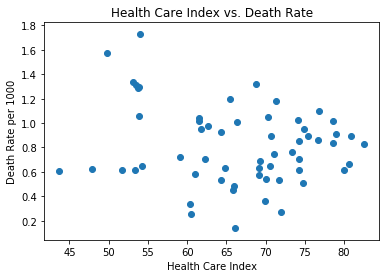

In [152]:
# Plotting Health Care Index vs. Total Death Rate
spend = new_df["Total expenditure (% GDP)"]
hci = new_df["Health Care Index"]
tdr = new_df['Total Death Rate']
plt.scatter(hci, tdr)
plt.ylabel('Death Rate per 1000')
plt.xlabel('Health Care Index')
plt.title('Health Care Index vs. Death Rate')

In [249]:
# Countries with highest and lowest death rates
new_df.sort_values(by=['Total Death Rate'], inplace=True, ascending=False)
death_rate_sort = new_df['Country'].unique()
most_deaths = death_rate_sort[0:10]
least_deaths = death_rate_sort[-11:-1]

In [250]:
# Filtering by countries with highest death rates per capita
# Averages between years 2014-2018
most_deaths_df = new_df[new_df["Country"].isin(most_deaths)]
md = most_deaths_df.groupby('Country').mean()
md = md.drop('Year',1)
md

,Neoplasms,Lower respiratory infections,Neonatal disorders,Cardiovascular diseases,Chronic respiratory diseases,Total Number of Deaths,Life Expectancy at birth,GDP per capita ($),Total expenditure (% GDP),Health Care Index,Population in thousands,Total Death Rate
Country,,,,,,,,,,,,
Belarus,19131.0,1143.0,207.2,75988.4,2259.2,120986.6,74.129268,5750.8,5.7,53.76,9468,1.285171
Bulgaria,22500.6,1948.4,186.0,77220.8,2948.4,123111.8,74.814634,6846.8,8.4,54.03,7085,1.730628
Croatia,14181.6,516.4,76.2,23941.2,1853.2,50142.0,77.826829,11479.4,7.8,65.49,4189,1.193578
Estonia,3840.0,224.6,12.8,7819.0,301.0,15303.8,78.092683,17112.0,6.4,71.30,1310,1.184504
Germany,262365.8,23695.6,1229.2,346639.0,43651.4,890261.4,80.992683,41686.2,11.3,76.74,82114,1.095954
Hungary,34337.8,1179.8,179.2,61240.2,6014.4,127318.0,75.817073,12350.6,7.4,53.46,9722,1.314215
Lithuania,8193.4,562.4,37.6,21666.0,798.6,39267.0,75.480488,14383.7,6.6,68.74,2890,1.318097
Romania,52153.0,6329.2,538.6,145015.8,7797.2,261045.6,75.309756,9120.7,5.6,53.11,19679,1.335861
Serbia,28232.2,1560.0,229.4,62260.6,3899.4,114872.0,75.539024,5238.6,10.4,53.86,8791,1.295700


In [261]:
cause_md = md.iloc[:,0:5]
cause_md["Total Number of Deaths"] = md["Total Number of Deaths"]
cause_md.sort_values(by=['Total Number of Deaths'], ascending=False)
x = cause_md.iloc[:,0:5]

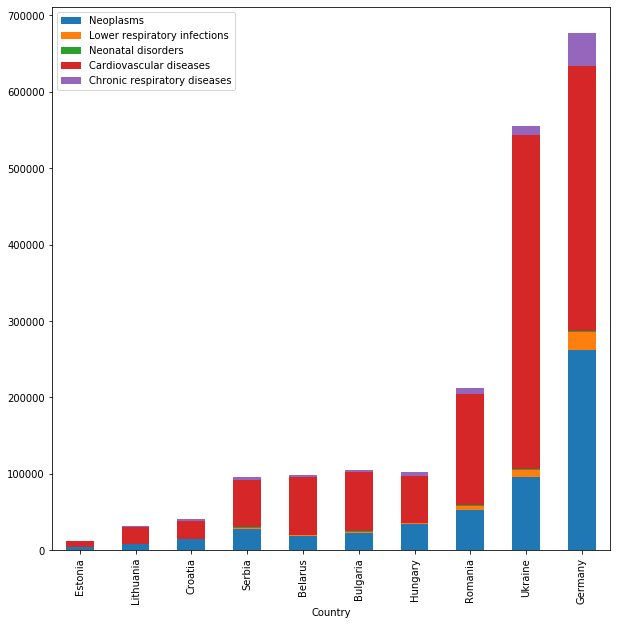

In [262]:
x.loc[md.sum(axis=1).sort_values().index].plot.bar(stacked=True, figsize=(10,10))

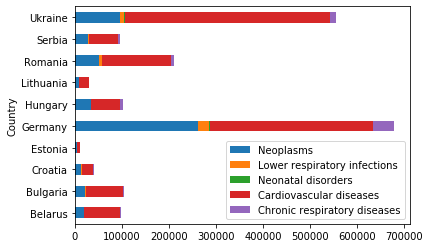

In [258]:
ax = x.plot.barh(stacked=True)

<BarContainer object of 10 artists>

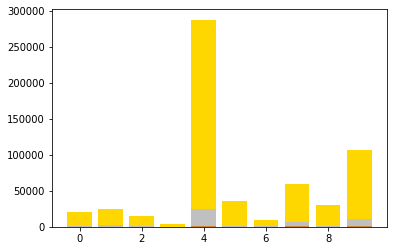

In [197]:
neo = cause_md["Neoplasms"]
lri = cause_md["Lower respiratory infections"]
neonat = cause_md["Neonatal disorders"]
cardio = cause_md["Cardiovascular diseases"]
chron = cause_md["Chronic respiratory diseases"]
ind = [x for x, _ in enumerate(most_deaths)]

plt.bar(ind, neo, width=0.8, label='neo', color='gold', bottom=lri+neonat)
plt.bar(ind, lri, width=0.8, label='lri', color='silver', bottom=chron+cardio
plt.bar(ind, cardio, width=0.8, label='cardio', color='blue', bottom=chron
plt.bar(ind, chron, width=0.8, label='chron', color='#CD853F')


In [146]:
# Filtering by countries with lowest death rates per capita
least_deaths_df = new_df[new_df["Country"].isin(least_deaths)]
ld = least_deaths_df.groupby('Country').mean()
ld = ld.drop('Year',1)
ld

,Neoplasms,Lower respiratory infections,Neonatal disorders,Cardiovascular diseases,Chronic respiratory diseases,Total Number of Deaths,Life Expectancy at birth,GDP per capita ($),Total expenditure (% GDP),Health Care Index,Population in thousands,Total Death Rate
Country,,,,,,,,,,,,
Colombia,45060.4,7458.4,4956.6,65344.6,15821.0,216979.8,76.925000,6056.1,7.2,65.79,49066,0.004556
Israel,13475.0,1630.2,251.4,11312.2,1865.8,41625.8,82.551220,37129.4,7.8,74.78,8322,0.005052
Jordan,4581.6,933.2,1586.2,9388.6,685.6,24951.8,74.292000,4940.1,7.5,71.92,9702,0.002719
Lebanon,7135.4,898.2,499.2,15817.6,1158.6,32304.0,78.833000,8571.4,6.4,64.28,6082,0.005358
Malaysia,27083.4,19863.4,1475.4,50868.4,6221.0,147937.0,75.828000,9768.4,4.2,65.99,31624,0.004874
Mexico,95602.2,21452.6,14511.0,152310.2,34500.2,670233.4,74.947000,8980.9,6.3,70.11,129163,0.005412
Saudi Arabia,11377.6,4433.4,1425.0,41933.4,3501.4,108568.4,74.874000,20710.6,4.7,60.41,32938,0.003366
Singapore,6261.8,3057.0,34.0,6133.2,646.8,20021.0,83.095122,52239.0,4.9,69.87,5709,0.003582
Turkey,98581.0,13780.8,8545.6,170254.6,32569.4,422662.4,77.161000,9125.8,5.4,71.68,80745,0.005326
